# Heart Attack Possibility

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [172]:
df = pd.read_csv('./data/heart.csv')

In [173]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


About data set
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Attribute Information
- age (umur)
- sex (jenis kelamin)
- chest pain type (4 values: 1 = Angina khas, 2 = Angina Atipikal, 3 = Nyeri non-Angina, 4 = Asimtomatik)
- resting blood pressure (Tekanan darah saat istirahat > 120 mg / dl)
- serum cholestoral in mg/dl 
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0 = Normal ,1 = Memiliki gelombang kelainan ST-T, 2 = Menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri dengan criteria estes)
- maximum heart rate achieved (detak jantung maksimum ynag dicapai)
- exercise induced angina (latihan diinduksi Angina)
- oldpeak = ST depression induced by exercise relative to rest (Depresi ST akibat latihan relatif terhadap istirahat)
- the slope of the peak exercise ST segment (1 = condong ke atas, 2 = datar, 3 = sedikit landai)
- number of major vessels (0-3) colored by flourosopy (jumlah nadi utama)
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (normal, cacat tetap, cacat sementara)
- target: 0= less chance of heart attack 1= more chance of heart attack

Dataset is taken for learning purpose. Source of the data : https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [175]:
df.shape

(303, 14)

In [176]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [177]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Melihat distribusi data

In [178]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex' ,'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [179]:
num_colors = ['#FF4848', '#FFD371', '#64C9CF', '#9DDAC6', '#FA8072']
cat_colors = ['#64C9CF', '#C2FFD9', '#EFB7B7', '#FDE49C', '#28FFBF', '#FF67E7', '#FFF338', '#C9D8B6']

- Numerical Features

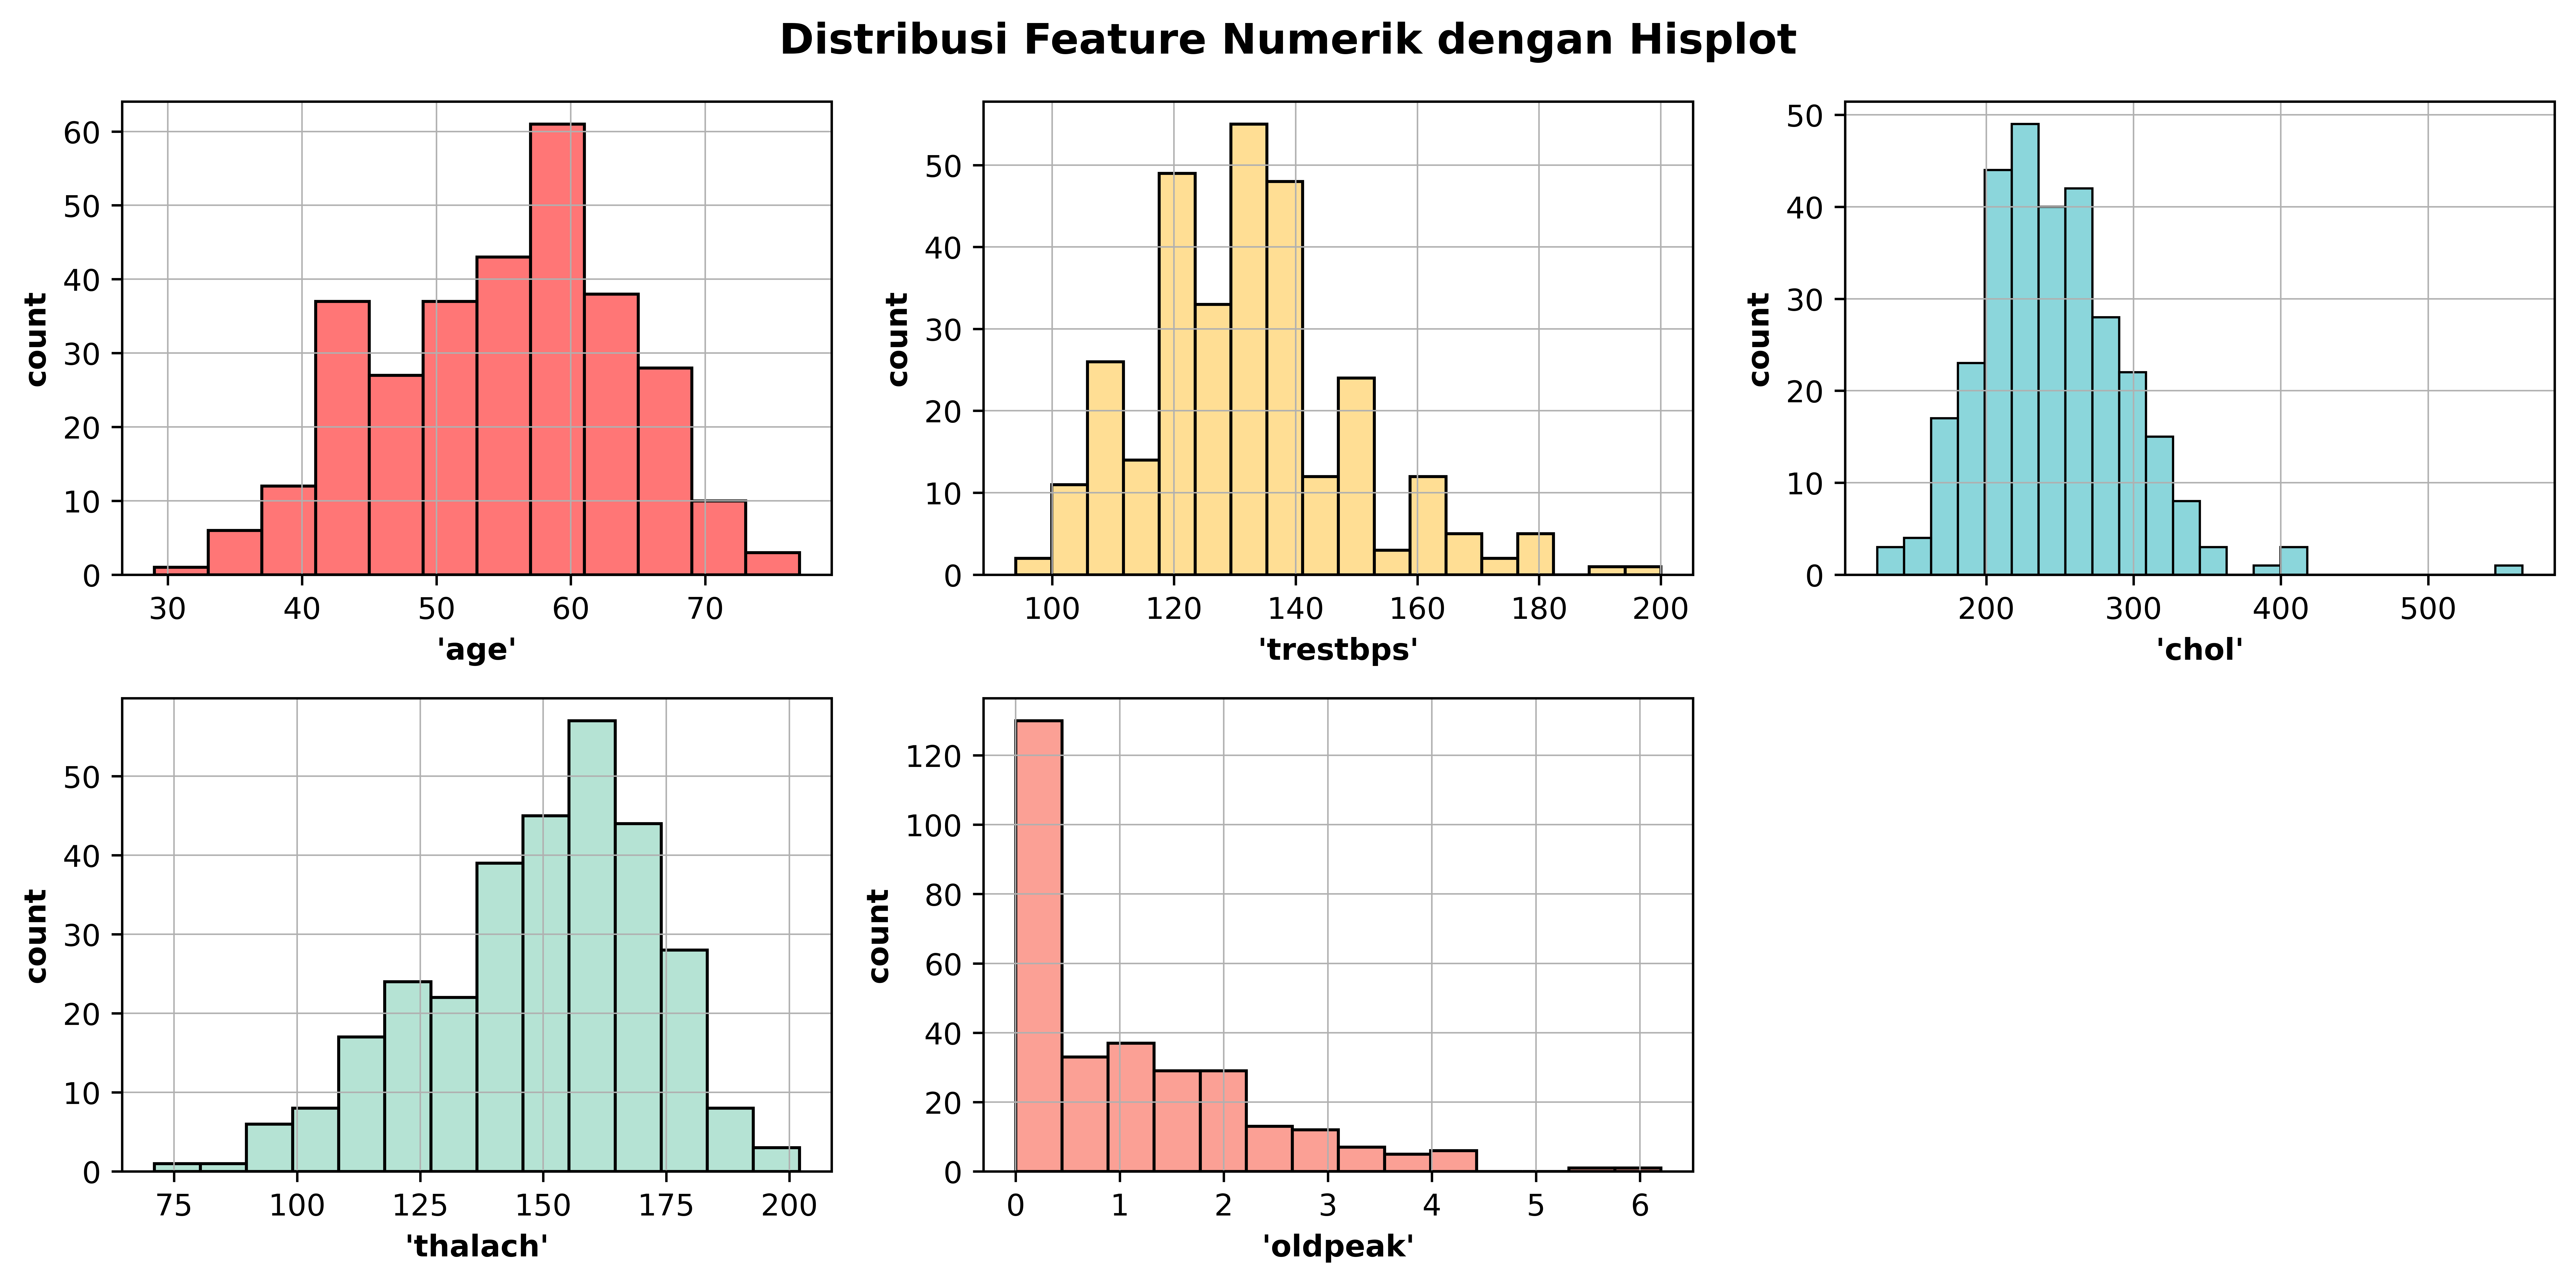

In [180]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6), dpi=800)
ax = ax.flatten()
plt.suptitle("Distribusi Feature Numerik dengan Hisplot", fontsize=14, fontweight='bold')

for col, index in zip(num_cols, range(len(num_cols))):
    sns.histplot(ax=ax[num_cols.index(col)], data=df[col], color=num_colors[index])
    ax[num_cols.index(col)].grid(linewidth=0.5)
    ax[num_cols.index(col)].set_xlabel(f"'{col}'", fontsize=10, fontweight='bold')
    ax[num_cols.index(col)].set_ylabel("count", fontsize=10, fontweight='bold')

ax[len(num_cols)].set_axis_off()
plt.tight_layout()
plt.show()

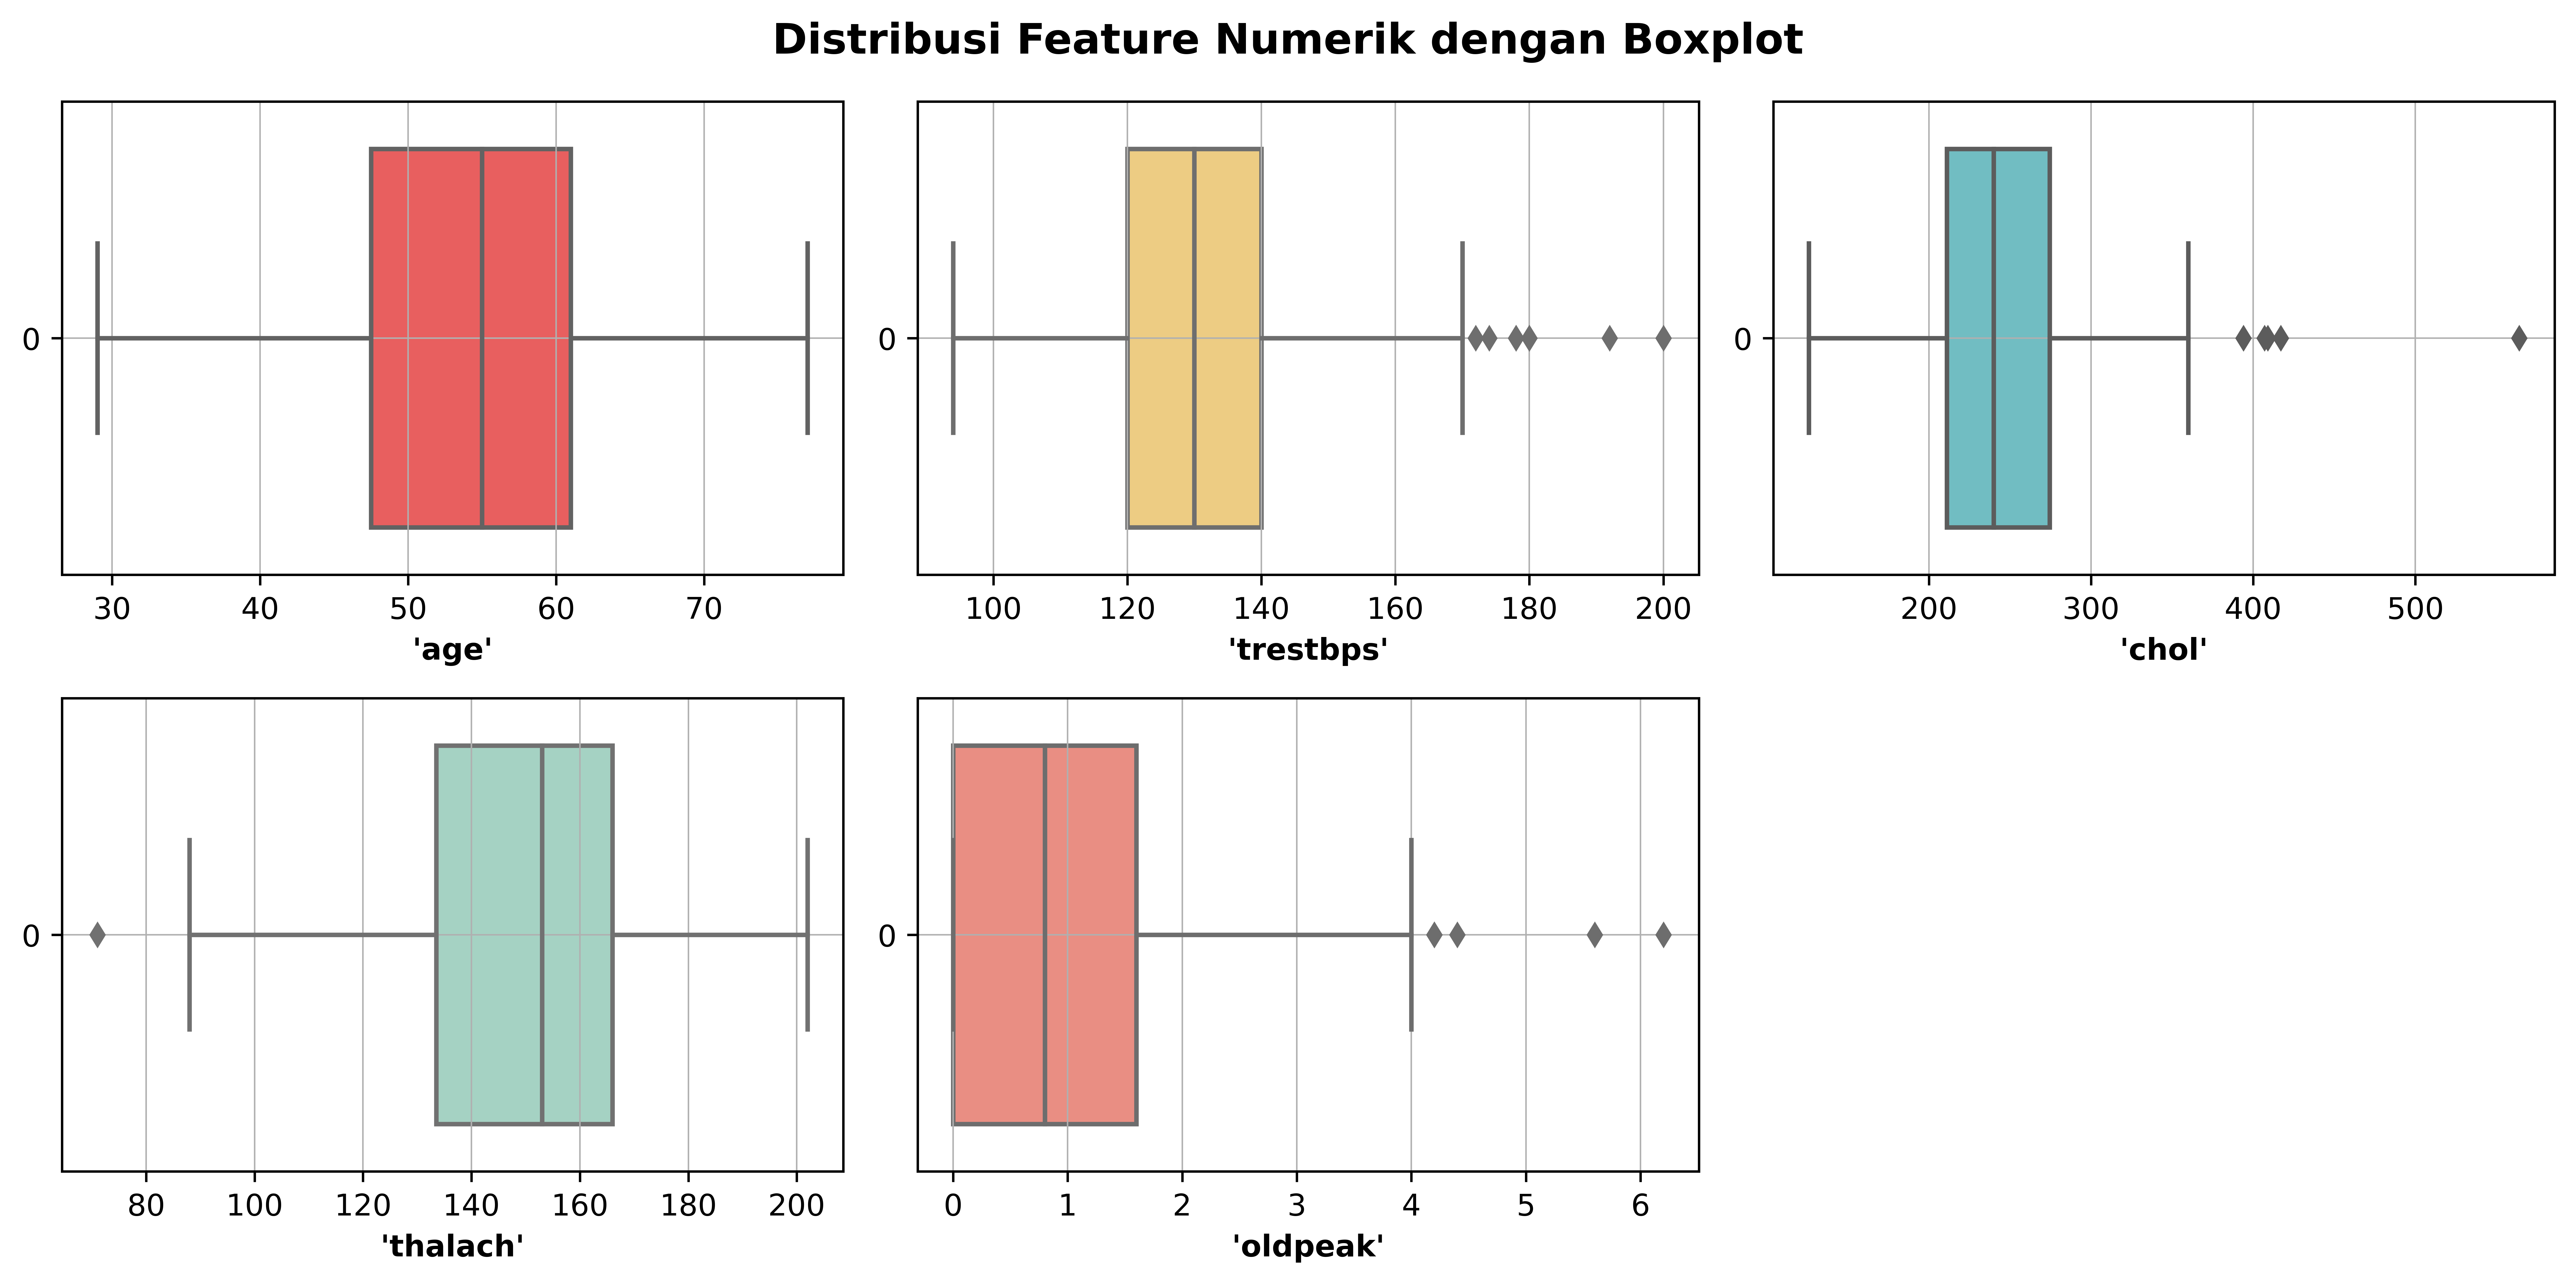

In [181]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6), dpi=800)
ax = ax.flatten()
plt.suptitle("Distribusi Feature Numerik dengan Boxplot", fontsize=14, fontweight='bold')

for col, index in zip(num_cols, range(len(num_cols))):
    sns.boxplot(ax=ax[num_cols.index(col)], data=df[col], orient='h', color=num_colors[index])
    ax[num_cols.index(col)].grid(linewidth=0.5)
    ax[num_cols.index(col)].set_xlabel(f"'{col}'", fontsize=10, fontweight='bold')

ax[len(num_cols)].set_axis_off()
plt.tight_layout()
plt.show()

- Catagorical Features

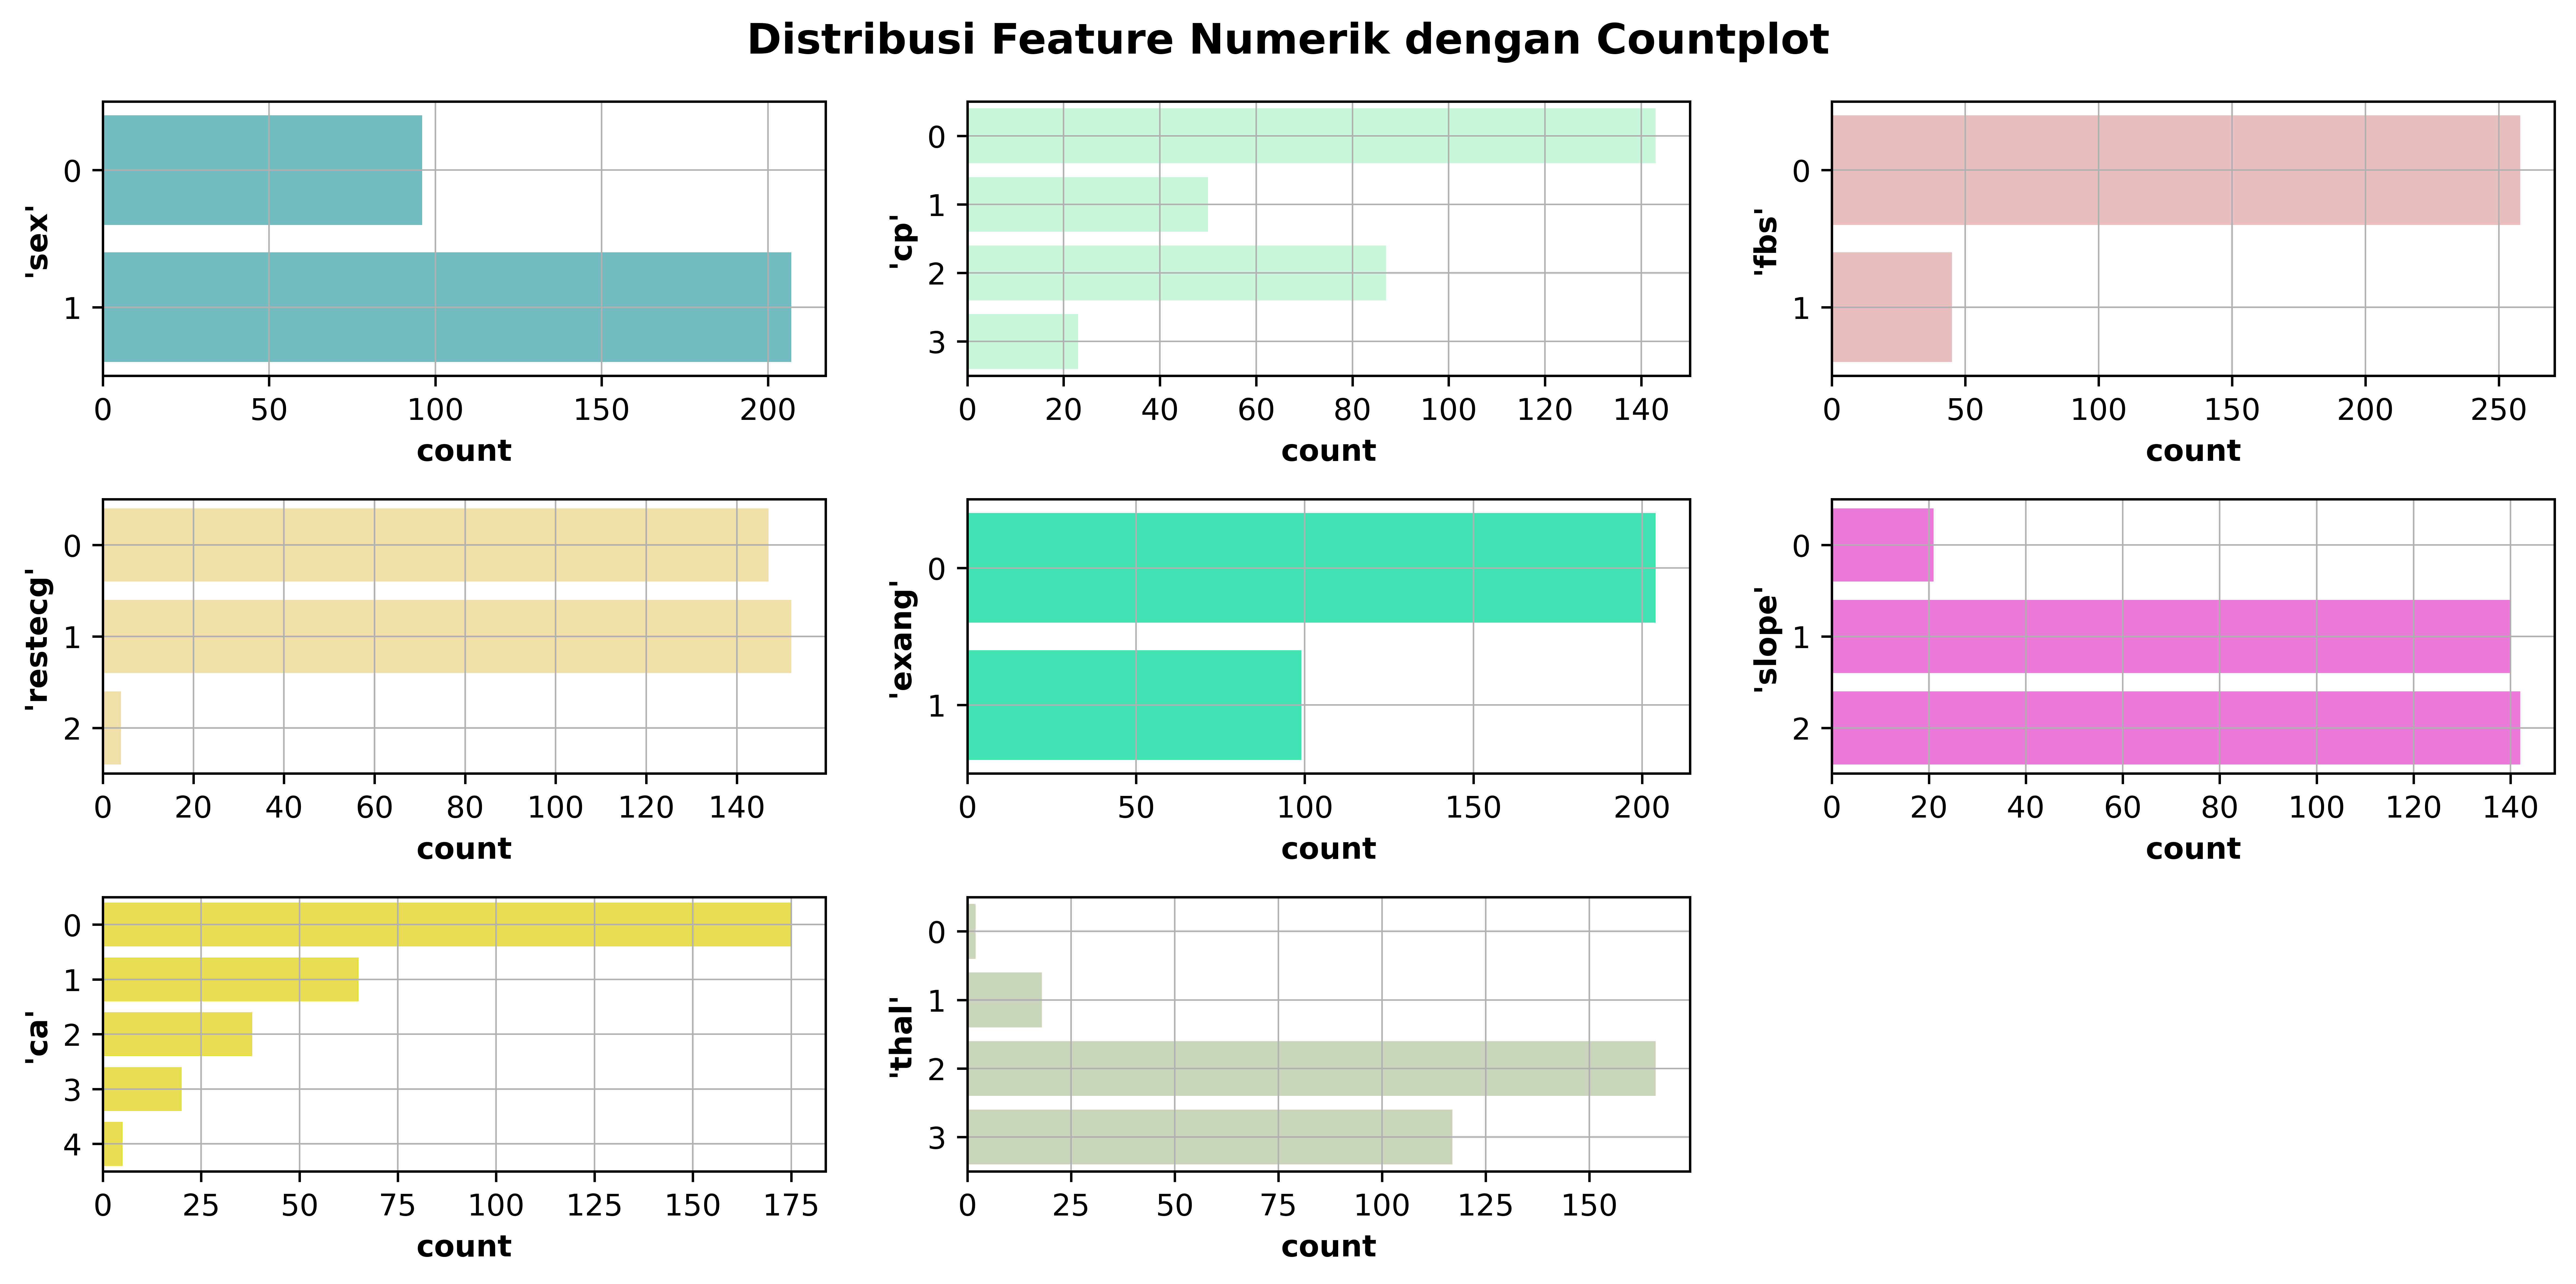

In [182]:
fig, ax = plt.subplots(3, 3, figsize=(12, 6), dpi=800)
ax = ax.flatten()
plt.suptitle("Distribusi Feature Numerik dengan Countplot", fontsize=14, fontweight='bold')

for col, index in zip(cat_cols, range(len(cat_cols))):
    sns.countplot(ax=ax[cat_cols.index(col)], y= col, data=df, color=cat_colors[index])
    ax[cat_cols.index(col)].grid(linewidth=0.5)
    ax[cat_cols.index(col)].set_xlabel("count", fontsize=10, fontweight='bold')
    ax[cat_cols.index(col)].set_ylabel(f"'{col}'", fontsize=10, fontweight='bold')

ax[len(cat_cols)].set_axis_off()
plt.tight_layout()
plt.show()

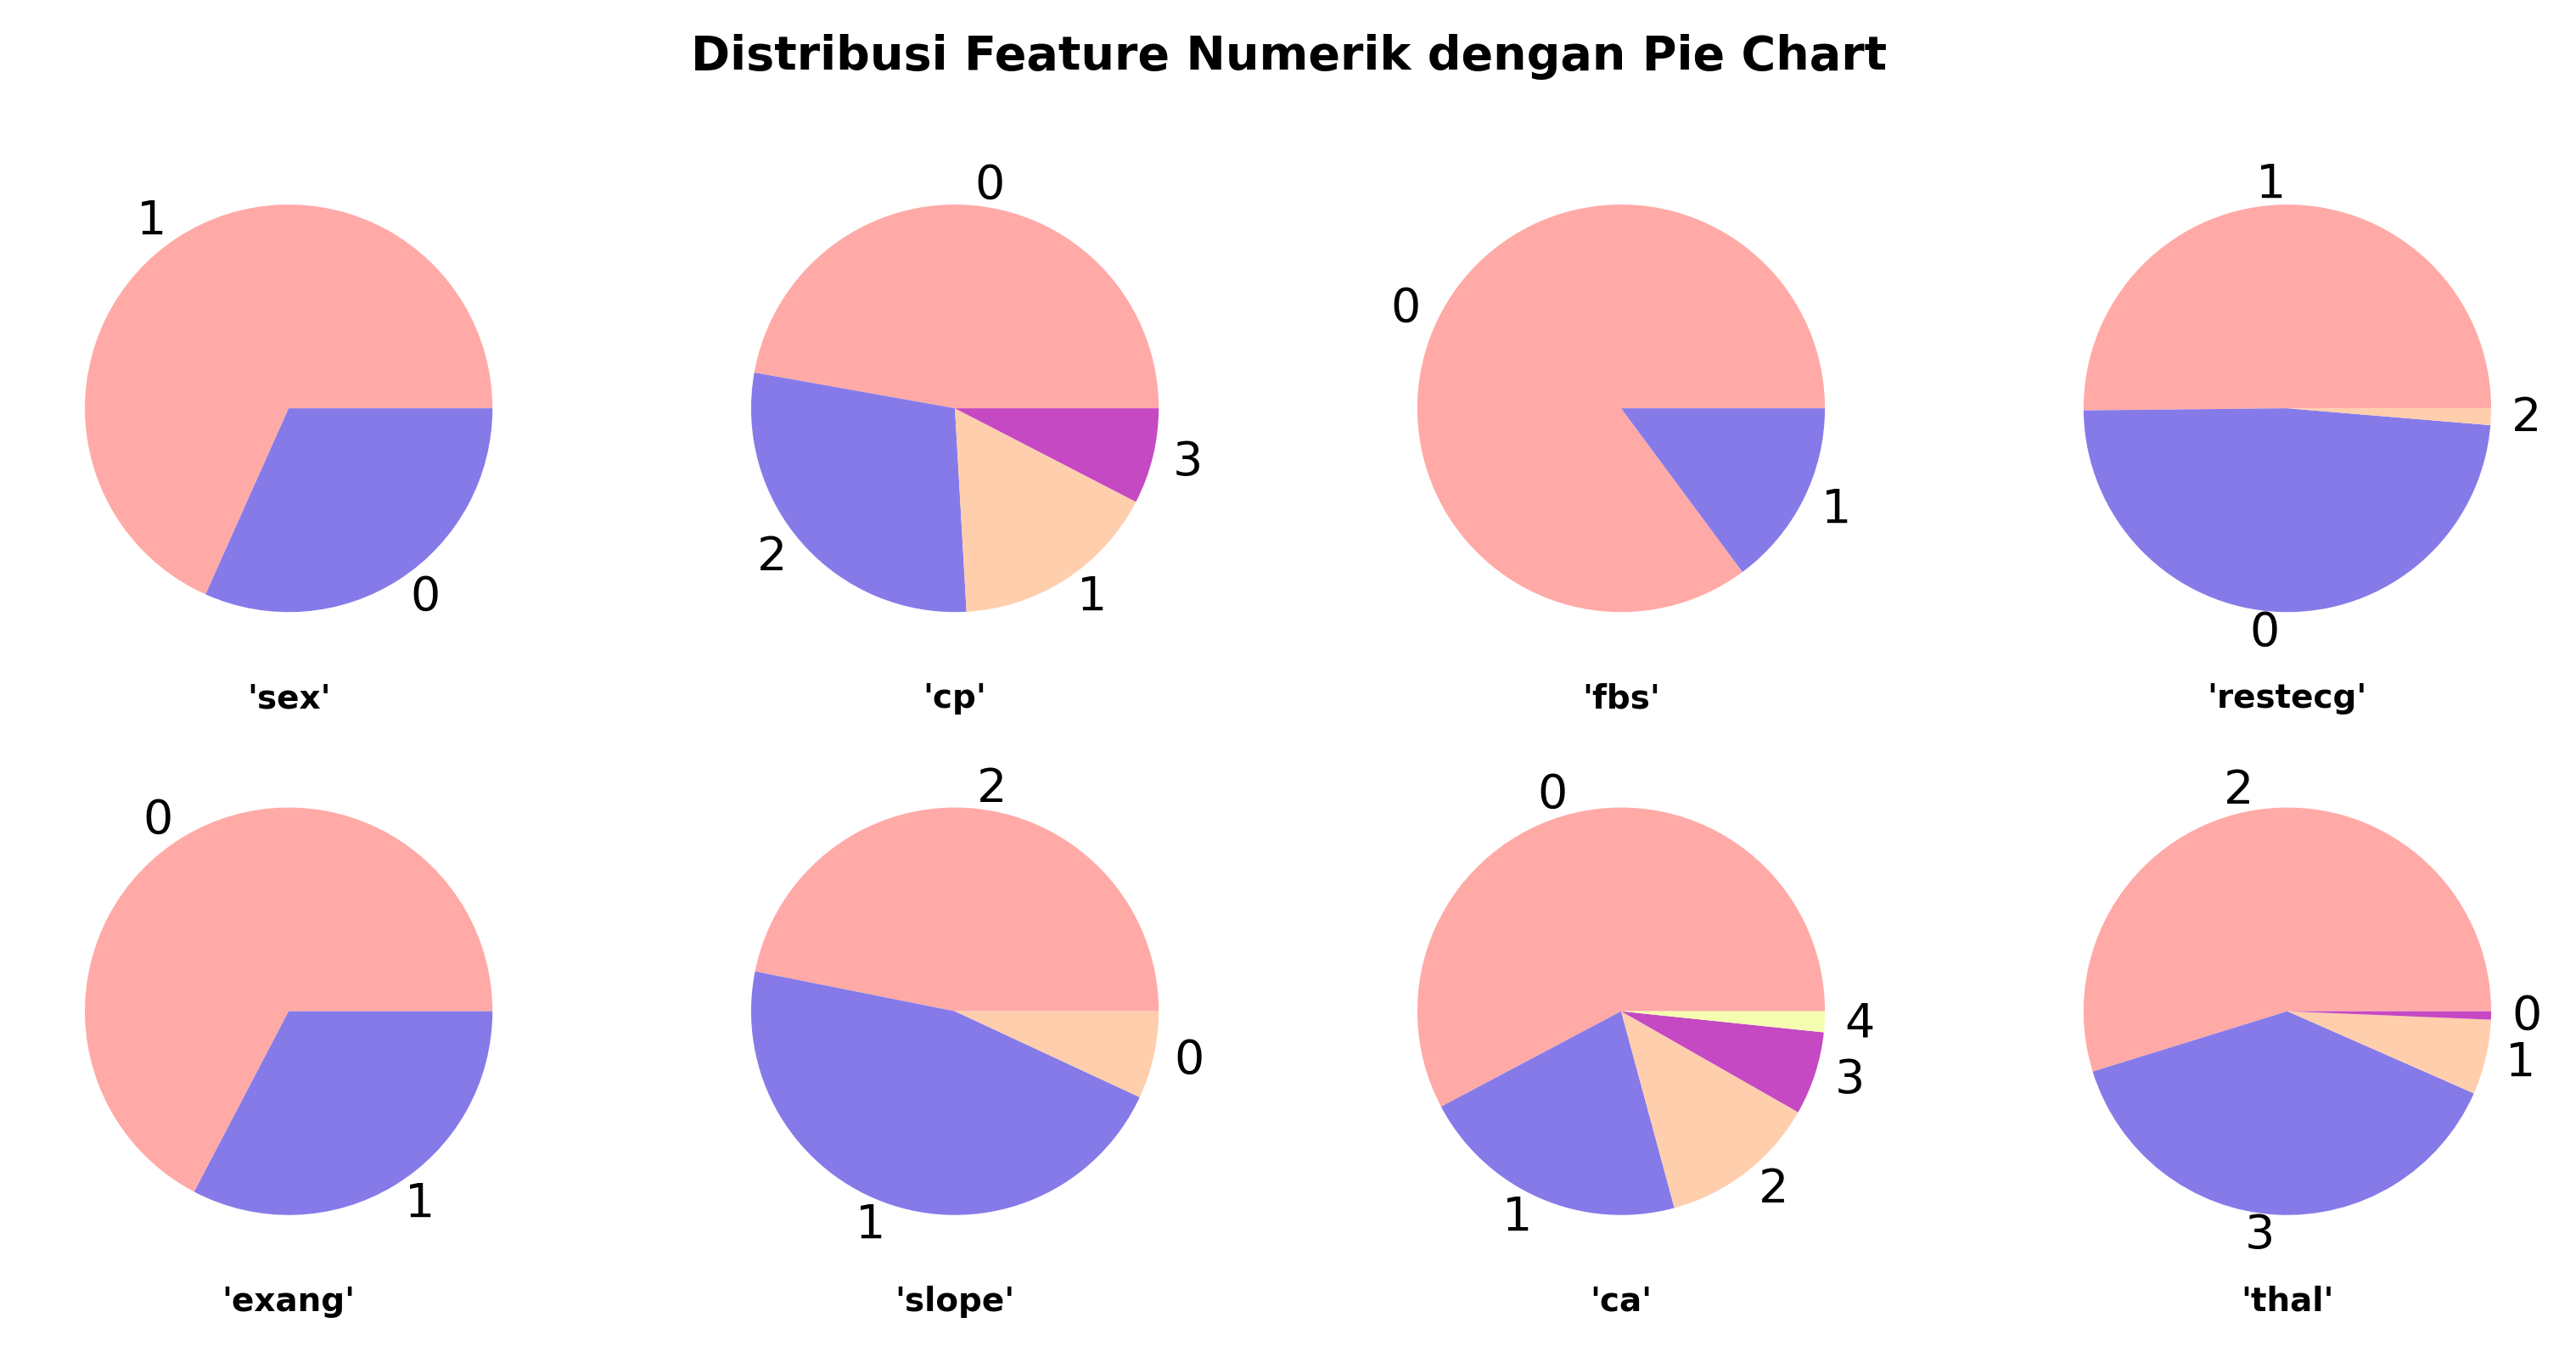

In [183]:
fig, ax = plt.subplots(2, 4, figsize=(8, 4), dpi=400)
ax = ax.flatten()
plt.suptitle("Distribusi Feature Numerik dengan Pie Chart", fontsize=10, fontweight='bold')

colors = ['#FFAAA7', '#867AE9', '#FFCEAD', '#C449C2', '#F5FDB0']

for col in cat_cols:
    df[col].value_counts().plot(ax=ax[cat_cols.index(col)], colors=colors ,kind='pie')
    ax[cat_cols.index(col)].set_xlabel(f"'{col}'", fontsize=7, fontweight='bold')
    ax[cat_cols.index(col)].set_ylabel(None)

plt.tight_layout()
plt.show()